# ImmoCheck

This projects purpose is to give an overview how rent and buying prices of real estate changed in vienna over the last years. Therefore certain steps are taken. First of all data gets imported and gathered through different sources. Futher cleaning and stucturing will also be apllied. The main parts like data explanation, analysis and also visulations for better understanding will give you a better understanding on the topic. In the last part, conslusions will be drwan. The cleaned and stuctured data will also be provided as csv files. \
Let's get started!

## Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Data Gathering

There will be four different sources of data. One Webscarping, one API and two files.

### Webscarping - Current cost of real estate

To get data regarding current costs of real estate, data from the webside "Immobilienscout24.at" will be scraped.

In [2]:
i = 1
url = ""
prices = []
while True:
    if i == 1:
        url = 'https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen'
    else:
        url = f'https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-{i}'

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    postings = soup.find_all('li', {'class': 'Item-item-S33'})
    i += 1
    scraped_vals = 0
    for ele in postings:
        for ele2 in (ele.select('a > section > section:nth-of-type(2) > ul:nth-of-type(1) > li:nth-of-type(2)')):
            prices.append(ele2.getText())
            scraped_vals += 1
    if postings == []:
        break;

    print(url,' scraped values:',scraped_vals)

https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen  scraped values: 15
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-2  scraped values: 14
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-3  scraped values: 15
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-4  scraped values: 12
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-5  scraped values: 15
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-6  scraped values: 15
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-7  scraped values: 14
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-8  scraped values: 13
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-9  scraped values: 14
https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen/seite-10  scraped values: 14
https://www.immobilienscout24.at/regional/wien/wien/wohnu

The scraped values get converted in a pandas dataFrame.

In [3]:
export_dict = {'vals':prices}
export_df = pd.DataFrame(export_dict)
export_df.head(10)

,vals
0,"ab 5.614,27 €/m²"
1,"ab 7.800,97 €/m²"
2,"ab 5.847,55 €/m²"
3,"ab 6.279,51 €/m²"
4,"ab 5.171,14 €/m²"
5,"ab 9.863,62 €/m²"
6,"ab 18.665,28 €/m²"
7,"ab 5.950,96 €/m²"
8,"ab 7.822,06 €/m²"
9,"ab 5.693,5 €/m²"


Looks good, but for further processing we just need the values.

In [4]:
export_df = export_df.replace('ab','',regex = True)
export_df = export_df.replace('€/m²','',regex = True)
export_df = export_df.replace(' ','',regex = True)
export_df.head(10)

,vals
0,"5.614,27"
1,"7.800,97"
2,"5.847,55"
3,"6.279,51"
4,"5.171,14"
5,"9.863,62"
6,"18.665,28"
7,"5.950,96"
8,"7.822,06"
9,"5.693,5"


Now the format has to be adapted.

In [5]:
export_df = export_df.apply(lambda x: x.str.replace('.',''))
export_df = export_df.apply(lambda x: x.str.replace(',','.'))
export_df.head(10)

,vals
0,5614.27
1,7800.97
2,5847.55
3,6279.51
4,5171.14
5,9863.62
6,18665.28
7,5950.96
8,7822.06
9,5693.5


Most of the values look good. However, wile scarping we also got some value which can not be further processed.

In [6]:
export_df[export_df['vals'].str.startswith('statt')]

,vals
253,statt215000€-7%
365,statt250000€-4%
398,statt330000€-3%
404,statt479000€-6%


These values get deleted.

In [7]:
export_df = export_df.drop([185,393,527,553])

KeyError: '[527, 553] not found in axis'

Now the value look good and are ready to be exported for later processing.

In [8]:
export_df.to_csv('./exports/prices.csv', index=False)  

### Datasource 2 - Historical cost of renting an apartment

To get historical data regarding costs of renting an apartment in Vienna, data in form of .ods files from the website "statistik.at" is used.

In [14]:
!pip install pdfplumber pandas openpyxl odfpy

     ---------------------------------------- 0.0/717.0 kB ? eta -:--:--
      --------------------------------------- 10.2/717.0 kB ? eta -:--:--
     - ----------------------------------- 30.7/717.0 kB 262.6 kB/s eta 0:00:03
     --- --------------------------------- 61.4/717.0 kB 409.6 kB/s eta 0:00:02
     --------- ---------------------------- 184.3/717.0 kB 1.0 MB/s eta 0:00:01
     -------------------------------------  716.8/717.0 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 717.0/717.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=137513 sha256=1441164f840d18fee05c84063154c8c521c5042a2ee2b76bef0d8a307a36117f
  Stored in directory: c:\users\smurh\appdata\local\pip\cache\wheels\d6\1d\c8\8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract the row with "Wien" from the ODS files and add the filename as a column
def extract_wien_data(file_path):
    data = pd.read_excel(file_path, engine='odf')
    wien_data = data[data.apply(lambda row: row.astype(str).str.contains('Wien').any(), axis=1)].copy() 
    wien_data.loc[:, 'Source File'] = file_path  # to assign the filename
    return wien_data

# ODS files 2015 to 2020
ods_files_2015_2020 = [
    "statistik austria/2015.ods",
    "statistik austria/2016.ods",
    "statistik austria/2017.ods",
    "statistik austria/2018.ods",
    "statistik austria/2019.ods",
    "statistik austria/2020.ods"
]

# ODS files 2021 and 2022
ods_files_2021_2022 = [
    "statistik austria/2021.ods",
    "statistik austria/2022.ods"
]

# Extract "Wien" data from 2015 to 2020
wien_data_list_2015_2020 = [extract_wien_data(file) for file in ods_files_2015_2020]
wien_data_list_2015_2020 = [df for df in wien_data_list_2015_2020 if not df.empty and not df.isna().all().all()]
combined_wien_data_2015_2020 = pd.concat(wien_data_list_2015_2020, ignore_index=True)
combined_wien_data_2015_2020 = combined_wien_data_2015_2020.drop_duplicates()
wien_column_values_2015_2020 = combined_wien_data_2015_2020[['Unnamed: 12', 'Source File']]

# Extract "Wien" data from 2021 and 2022
wien_data_list_2021_2022 = [extract_wien_data(file) for file in ods_files_2021_2022]
wien_data_list_2021_2022 = [df for df in wien_data_list_2021_2022 if not df.empty and not df.isna().all().all()]
combined_wien_data_2021_2022 = pd.concat(wien_data_list_2021_2022, ignore_index=True)
combined_wien_data_2021_2022 = combined_wien_data_2021_2022.drop_duplicates()
wien_column_values_2021_2022 = combined_wien_data_2021_2022[['Unnamed: 5', 'Source File']]

# Rename columns and combine both dataframes
wien_column_values_2015_2020.columns = ['Miete/m² in Wien', 'Source File']
wien_column_values_2021_2022.columns = ['Miete/m² in Wien', 'Source File']

combined_wien_all_years = pd.concat([wien_column_values_2015_2020, wien_column_values_2021_2022], ignore_index=True)

# Extract year from source file and add as a new column
combined_wien_all_years['Jahr'] = combined_wien_all_years['Source File'].apply(lambda x: x.split('/')[-1].split('.')[0])

# Drop the source file column
combined_wien_all_years = combined_wien_all_years.drop(columns=['Source File'])

# Convert "Miete/m² in Wien" to a float and round to one decimal place
combined_wien_all_years['Miete/m² in Wien'] = combined_wien_all_years['Miete/m² in Wien'].astype(float).round(1)

# Error message "FutureWarning: (...) " can be ignored!

C:\Users\smurh\AppData\Local\Temp\ipykernel_13720\1623310260.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_wien_data_2015_2020 = pd.concat(wien_data_list_2015_2020, ignore_index=True)


In [57]:
# the combined data
print(combined_wien_all_years)

   Miete/m² in Wien  Jahr
0               5.2  2015
1               5.4  2016
2               5.7  2017
3               5.9  2018
4               6.1  2019
5               6.3  2020
6               6.3  2021
7               6.6  2022


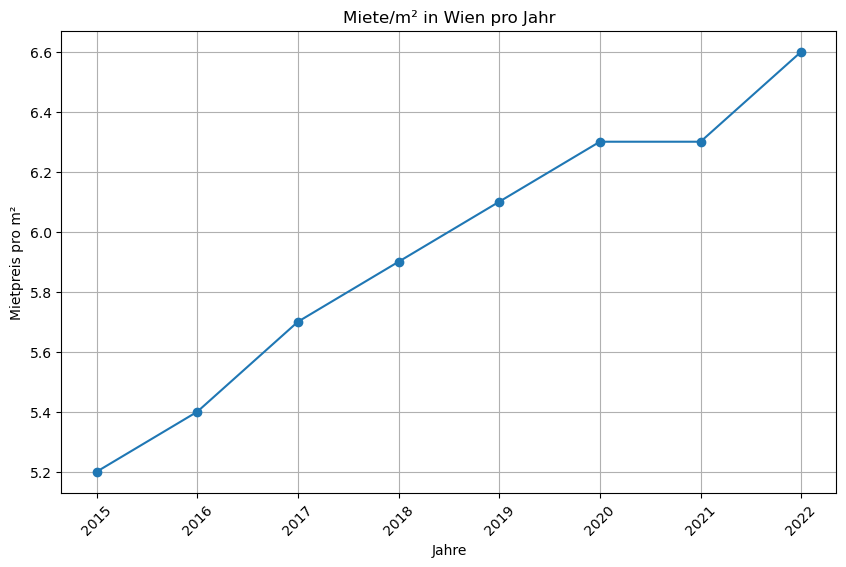

In [60]:
# Visualization with Line Plot
plt.figure(figsize=(10, 6))
plt.plot(combined_wien_all_years['Jahr'], combined_wien_all_years['Miete/m² in Wien'], marker='o')
plt.xlabel('Jahre')
plt.ylabel('Mietpreis pro m²')
plt.title('Miete/m² in Wien pro Jahr')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

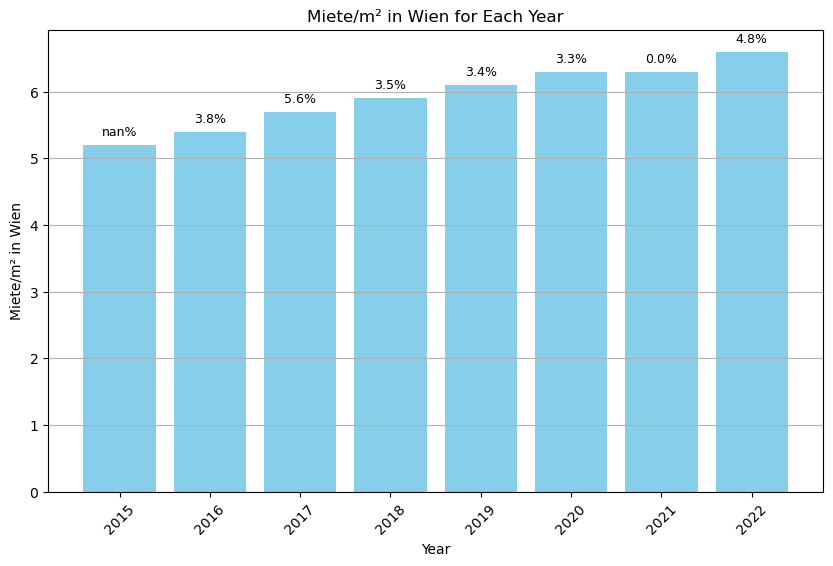

In [63]:
# Calculate the percentage change from year to year
combined_wien_all_years['Miete/m² in Wien'] = combined_wien_all_years['Miete/m² in Wien']
combined_wien_all_years['Prozentuale Veränderung'] = combined_wien_all_years['Miete/m² in Wien'].pct_change().mul(100).round(1)

# Visualization with Bar Chart 
plt.figure(figsize=(10, 6))
plt.bar(combined_wien_all_years['Jahr'], combined_wien_all_years['Miete/m² in Wien'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Miete/m² in Wien')
plt.title('Miete/m² in Wien for Each Year')
plt.grid(axis='y')
plt.xticks(rotation=45)

# Add percentage change as text above the bars
for i, (year, value, change) in enumerate(zip(combined_wien_all_years['Jahr'], combined_wien_all_years['Miete/m² in Wien'], combined_wien_all_years['Prozentuale Veränderung'])):
    plt.text(i, value + 0.1, f'{change}%', ha='center', va='bottom', fontsize=9)

plt.show()

### Datasource 3 - Historical cost of real estate

In [2]:
import pandas as pd

# Datei einlesen und den spezifischen Reiter "Wien" laden
file_path = './statistik austria/Wohnungspreise2016.ods'

# Den ODS-Reader verwenden und den Reiter "Wien" laden
df_wien = pd.read_excel(file_path, engine='odf', sheet_name='Wien', header=[3, 4])

# Unnötige Spalten entfernen, falls erforderlich
df_wien = df_wien.dropna(axis=1, how='all')

# Ergebnis anzeigen
print(df_wien.head())

         Unnamed: 0_level_0 Wohnfläche nach Baujahr              \
                    Bezirke                Bis 1960  Bis 1960.1   
0                       NaN       Weniger als 56 m²  56 - 80 m²   
1  Wien  1.,Innere Stadt 3)                    5901        5901   
2     Wien  2.,Leopoldstadt                    2533        2532   
3       Wien  3.,Landstraße                    2782        2819   
4           Wien  4.,Wieden                    3050        2944   

                                                                    \
        Bis 1960.2          1961-1990 1961-1990.1      1961-1990.2   
0  Mehr als  80 m²  Weniger als 56 m²  56 - 80 m²  Mehr als  80 m²   
1             5901               4067        4067             4067   
2             2534               2748        2747             2749   
3             2862               2710        2746             2788   
4             3076               2738        2643             2761   

                                       

In [4]:
# Letzte Spalte identifizieren
last_column = df_wien.columns[-1]

# Konvertiere die Spalte in einen numerischen Datentyp (falls nötig)
df_wien[last_column] = pd.to_numeric(df_wien[last_column], errors='coerce')

# Mittelwert berechnen
mean_value = df_wien[last_column].mean()

print(f"Der Mittelwert der letzten Spalte '{last_column[1]}' beträgt: {mean_value}")

Der Mittelwert der letzten Spalte 'Ab 1991.2' beträgt: 4577.369565217391


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Liste der Dateipfade und entsprechenden Jahre
files = [
    ('./statistik austria/Wohnungspreise2016.ods', 2016),
    ('./statistik austria/Wohnungspreise2017.ods', 2017),
    ('./statistik austria/Wohnungspreise2018.ods', 2018),
    ('./statistik austria/Wohnungspreise2019.ods', 2019),
    ('./statistik austria/Wohnungspreise2020.ods', 2020),
    ('./statistik austria/Wohnungspreise2021.ods', 2021),
    ('./statistik austria/Wohnungspreise2022.ods', 2022),
]

# Funktion, um den Mittelwert der letzten Spalte für ein spezifisches Sheet zu berechnen
def calculate_mean(file_path, sheet_name='Wien'):
    df = pd.read_excel(file_path, engine='odf', sheet_name=sheet_name, header=[3, 4])
    df = df.dropna(axis=1, how='all')
    last_column = df.columns[-1]
    df[last_column] = pd.to_numeric(df[last_column], errors='coerce')
    return df[last_column].mean()

# Dictionary, um die Ergebnisse zu speichern
results = {}

# Schleife durch die Dateien und berechne den Mittelwert
for file_path, year in files:
    mean_value = calculate_mean(file_path)
    results[year] = mean_value

# Daten für 2015 einlesen, bereinigen und den Mittelwert berechnen
file_path_2015 = './statistik austria/Wohnungspreise2015.ods'
sheet_name_2015 = 'Wohnungen_ohne_Außenflächen'
df_2015_ohne_außenflächen = pd.read_excel(file_path_2015, engine='odf', sheet_name=sheet_name_2015, header=[2, 3])
df_2015_ohne_außenflächen_cleaned = df_2015_ohne_außenflächen.dropna(axis=1, how='all')

# Zeilen für Wiener Bezirke extrahieren
vienna_districts_2015 = df_2015_ohne_außenflächen_cleaned[
    df_2015_ohne_außenflächen_cleaned.iloc[:, 0].str.contains(
        'Innere Stadt|Leopoldstadt|Landstraße|Wieden|Margareten|Mariahilf|Neubau|Josefstadt|Alsergrund|Favoriten|Simmering|Meidling|Hietzing|Penzing|Rudolfsheim-Fünfhaus|Ottakring|Hernals|Währing|Döbling|Brigittenau|Floridsdorf|Donaustadt|Liesing',
        na=False
    )
]
last_column_2015 = vienna_districts_2015.columns[-1]
vienna_districts_2015[last_column_2015] = pd.to_numeric(vienna_districts_2015[last_column_2015], errors='coerce')
mean_value_2015 = vienna_districts_2015[last_column_2015].mean()

# Füge den Wert für 2015 zu den vorhandenen Ergebnissen hinzu
results[2015] = mean_value_2015

# Konvertiere die Ergebnisse in ein DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Year', 'Mean']).sort_values('Year').reset_index(drop=True)

# Berechne die prozentuale Veränderung
results_df['Percentage Change'] = results_df['Mean'].pct_change() * 100

# Ergebnisse anzeigen
print(results_df)

# Error message can be ignored!

   Year         Mean  Percentage Change
0  2015  2948.181818                NaN
1  2016  4577.369565          55.260762
2  2017  4910.804348           7.284419
3  2018  5108.978261           4.035467
4  2019  5667.304348          10.928332
5  2020  5947.521739           4.944456
6  2021  6311.673913           6.122755
7  2022  6994.673913          10.821218


C:\Users\smurh\AppData\Local\Temp\ipykernel_9428\615478606.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vienna_districts_2015[last_column_2015] = pd.to_numeric(vienna_districts_2015[last_column_2015], errors='coerce')


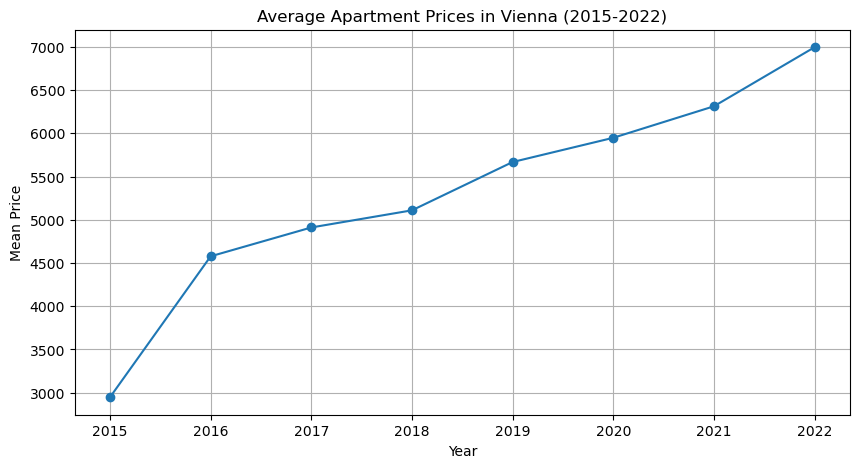

In [14]:
# Plot the mean values per year
plt.figure(figsize=(10, 5))
plt.plot(results_df['Year'], results_df['Mean'], marker='o', linestyle='-')
plt.title('Average Apartment Prices in Vienna (2015-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

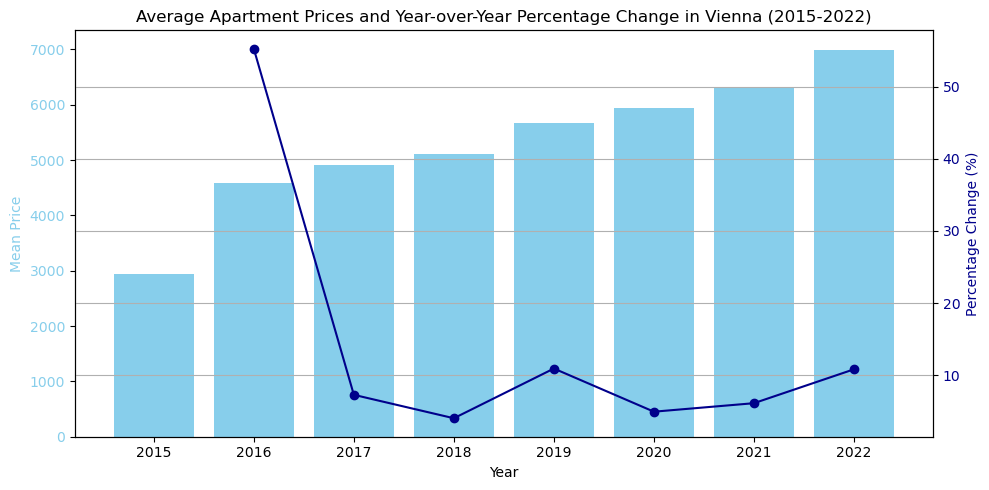

In [15]:
# Plot the mean values per year as a bar chart
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(results_df['Year'], results_df['Mean'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Price', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Average Apartment Prices and Year-over-Year Percentage Change in Vienna (2015-2022)')

# Create a secondary y-axis to plot the percentage change
ax2 = ax1.twinx()
ax2.plot(results_df['Year'], results_df['Percentage Change'], color='darkblue', marker='o', linestyle='-')
ax2.set_ylabel('Percentage Change (%)', color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

fig.tight_layout()  # Ensure everything fits without overlapping
plt.grid(True)
plt.show()

In [ ]:
x